In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("Data/advertising.csv")
print(df.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [21]:
def load_and_prepare_data(path, target_col):
    df = pd.read_csv(path)
    
    # Separate features and target
    X = df.drop(columns=[target_col]).select_dtypes(include=[np.number]).values
    y = df[target_col].values
    
    # Standardize features and target
    X = (X - X.mean(axis=0)) / X.std(axis=0)
    y = (y - y.mean()) / y.std()
    
    # Add bias term
    X_bias = np.c_[np.ones((X.shape[0], 1)), X]
    return X_bias, y


In [22]:
def mse_loss(X, y, w):
    preds = X @ w
    return np.mean((preds - y) ** 2)

def mse_grad(X, y, w):
    preds = X @ w
    return (2 / X.shape[0]) * X.T @ (preds - y)

In [23]:
def gradient_descent(X, y, lr=0.01, max_iter=200):
    w = np.zeros(X.shape[1])
    losses = []
    for _ in range(max_iter):
        grad = mse_grad(X, y, w)
        w -= lr * grad
        losses.append(mse_loss(X, y, w))
    return w, losses

def momentum_gd(X, y, lr=0.01, gamma=0.9, max_iter=200):
    w = np.zeros(X.shape[1])
    v = np.zeros_like(w)
    losses = []
    for _ in range(max_iter):
        grad = mse_grad(X, y, w)
        v = gamma * v + lr * grad
        w -= v
        losses.append(mse_loss(X, y, w))
    return w, losses

def nesterov_gd(X, y, lr=0.01, gamma=0.9, max_iter=200):
    w = np.zeros(X.shape[1])
    v = np.zeros_like(w)
    losses = []
    for _ in range(max_iter):
        grad = mse_grad(X, y, w - gamma * v)
        v = gamma * v + lr * grad
        w -= v
        losses.append(mse_loss(X, y, w))
    return w, losses

In [24]:
def compare_optimizers(dataset_path, target_col, lr=0.01, gamma=0.9, max_iter=200):
    X, y = load_and_prepare_data(dataset_path, target_col)
    
    w_gd, losses_gd = gradient_descent(X, y, lr, max_iter)
    w_mom, losses_mom = momentum_gd(X, y, lr, gamma, max_iter)
    w_nag, losses_nag = nesterov_gd(X, y, lr, gamma, max_iter)
    
    plt.figure(figsize=(8, 5))
    plt.plot(losses_gd, label='Gradient Descent')
    plt.plot(losses_mom, label='Momentum GD')
    plt.plot(losses_nag, label='Nesterov GD')
    plt.xlabel('Iterations')
    plt.ylabel('MSE Loss')
    plt.title(f'Convergence on {target_col} dataset')
    plt.legend()
    plt.grid(True)
    plt.show()


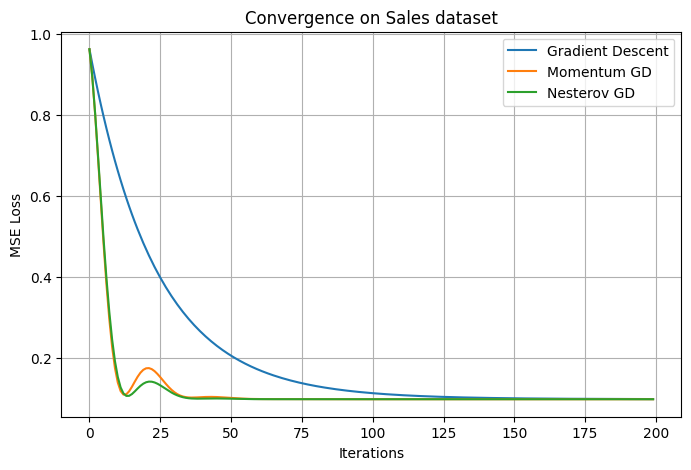

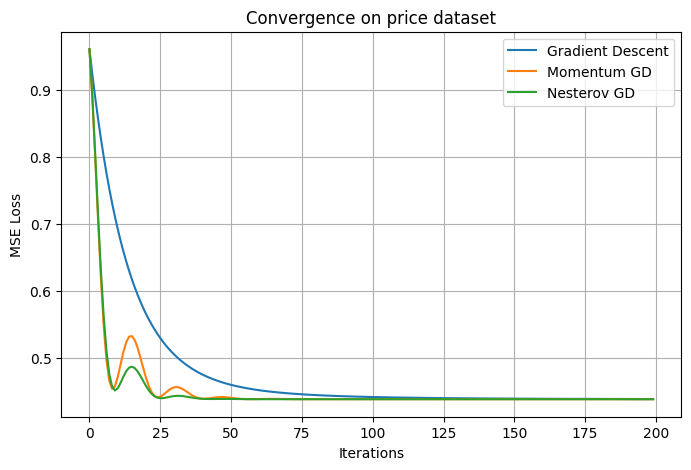

In [ ]:
compare_optimizers("Data/advertising.csv", "Sales")
compare_optimizers("Data/Housing.csv", "price")